In [85]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cpu'

In [86]:
import torchvision
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [87]:
len(train_data), len(test_data)

(60000, 10000)

In [88]:
image, label=train_data[0]
image[:10], label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [89]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [90]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [91]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, '9')

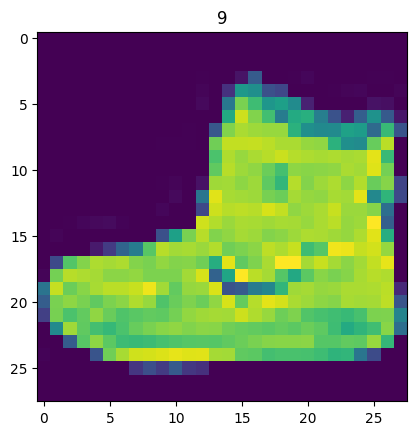

In [92]:
import matplotlib.pyplot as plt
image, label=train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

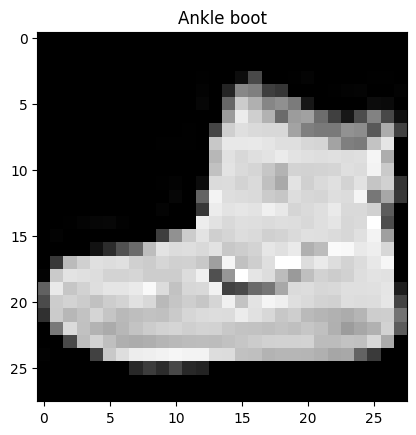

In [93]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

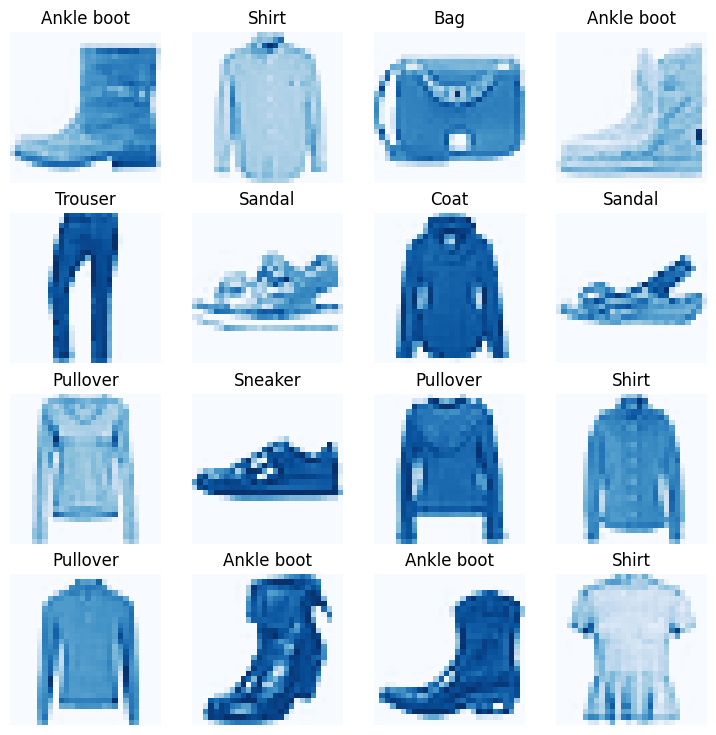

In [94]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9, 9))
rows, cols=4, 4
for i in range(1, (rows*cols)+1):
  random_idx=torch.randint(0, len(train_data), size=[1]).item()
  img, label=train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='Blues')
  plt.title(class_names[label])
  plt.axis(False)

In [95]:
from torch.utils.data import DataLoader
BATCH_SIZE=32

train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)


In [96]:
print(train_dataloader)
print(test_dataloader)

In [97]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [98]:
len(train_data)

60000

In [99]:
# check out what is insider of training dataloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape:  torch.Size([1, 28, 28])
label:  torch.Size([])


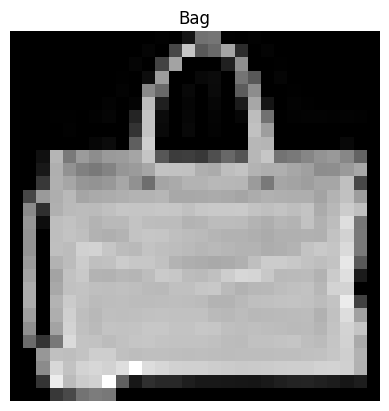

In [100]:
random_idx=torch.randint(0, len(train_features_batch), size=[1]).item()
img, label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print('Image shape: ', img.shape)
print('label: ', label.shape)

In [101]:
from torch import nn
flatten_dn=nn.Flatten()
x=train_features_batch[0]
output=flatten_dn(x)
print(x.shape)
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [102]:
len(class_names)

10

In [103]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
      return self.layer_stack(x)


In [104]:
model_0=FashionMNISTModelV0(input_shape=784, hidden_units=8, output_shape=len(class_names)).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [105]:
# loss function
loss_fn=torch.nn.CrossEntropyLoss()
#optimizer



In [106]:
from pathlib import Path
import requests

if Path('helper_functions.py').is_file():
  print('Already exists')
else:
  request=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

Already exists


In [107]:
from helper_functions import accuracy_fn
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [108]:
# create function to time our expreriments
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device=None):
  total_time=end-start
  print(f'Train time on {device} : {total_time:.3f} seconds')
  return total_time

In [109]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n----')
  train_loss=0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(X)
    # forward pass
    y_pred=model_0(X)
    #calculate loss
    loss=loss_fn(y_pred, y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch% 400==0:
      print(f'Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples')
  train_loss/=len(train_dataloader)


  # Testing loop
  test_loss, test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      #forward
      test_pred=model_0(X)
      #loss
      test_loss+=loss_fn(test_pred, y).item()
      #accuracy
      test_acc+=accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
  # calculate test loss and acc for per batch
  test_loss = test_loss / len(test_dataloader)
  test_acc = test_acc / len(test_dataloader)
print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}|. Test acc:{ test_acc:.4f}')

train_time_end_on_cpu=timer()
total_time_model_0=print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device='CPU')
print(total_time_model_0)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 1
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 2
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5160 | Test loss: 0.5225|. Test acc:81.6593
Train time on CPU : 48.544 seconds
48.54400423300001


In [110]:
# Make predictions and get Model_0 result

In [111]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn=torch.nn.Module, accuracy_fn=None):
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
        X, y=X.to(device), y.to(device)
        y_pred=model(X)
        loss+=loss_fn(y_pred, y)
        acc+=accuracy_fn(y_pred.argmax(dim=1), y) # Pass arguments positionally
    loss=loss/len(data_loader)
    acc=acc/len(data_loader)
  return {'model name': model.__class__.__name__, 'model loss' : loss, 'model accuracy': acc}


In [112]:
torch.cuda.is_available()

False

In [113]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [114]:
device='cpu'

In [115]:
device

'cpu'

In [116]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int , hidden_units: int , output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
        # Removed ReLU from output layer
      )
  def forward(self, x):
    return self.layer_stack(x)

In [117]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [118]:
next(model_1.parameters()).device

device(type='cpu')

In [119]:
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [120]:
def train_step(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn, device: torch.device=device):
    train_loss=0
    train_acc=0 # Initialize train_acc
    model.train()
    for batch, (X, y) in enumerate(data_loader):
      X, y=X.to(device), y.to(device)
      y_pred=model(X) # Use 'model' (model_1) instead of model_0
      #calculate loss
      loss=loss_fn(y_pred, y)
      train_loss+=loss.item() # Add .item() for accumulation as float
      train_acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)).item() # Add .item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch% 400==0:
        print(f'Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples')
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f'Train loss {train_loss:.4f}| Train acc {train_acc:.4f}')

In [121]:
def test_step(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device: torch.device=device):
  test_loss, test_acc=0,0
  model.eval() # Use 'model' instead of model_0
  with torch.inference_mode():
    for X, y in data_loader:
      X, y=X.to(device), y.to(device)
      #forward
      test_pred=model(X)
      #loss
      test_loss+=loss_fn(test_pred, y).item()
      #accuracy
      test_acc+=accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)).item() # Add .item()
  # calculate test loss and acc for per batch
  test_loss = test_loss / len(data_loader)
  test_acc = test_acc / len(data_loader)
  print(f'Test loss: {test_loss:.4f}|. Test acc:{ test_acc:.4f}')

In [122]:
def train_step(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn, device: torch.device=device):
    train_loss=0
    train_acc=0 # Initialize train_acc
    model.train()
    for batch, (X, y) in enumerate(data_loader):
      X, y=X.to(device), y.to(device)
      y_pred=model(X) # Use 'model' (model_1) instead of model_0
      #calculate loss
      loss=loss_fn(y_pred, y)
      train_loss+=loss.item() # Add .item() for accumulation as float
      train_acc+=accuracy_fn(y_pred.argmax(dim=1), y) # Pass arguments positionally
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch% 400==0:
        print(f'Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples')
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f'Train loss {train_loss:.4f}| Train acc {train_acc:.4f}')

def test_step(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device: torch.device=device):
  test_loss, test_acc=0,0
  model.eval() # Use 'model' instead of model_0
  with torch.inference_mode():
    for X, y in data_loader:
      X, y=X.to(device), y.to(device)
      #forward
      test_pred=model(X)
      #loss
      test_loss+=loss_fn(test_pred, y).item()
      #accuracy
      test_acc+=accuracy_fn(test_pred.argmax(dim=1), y)# Pass arguments positionally
  # calculate test loss and acc for per batch
  test_loss = test_loss / len(data_loader)
  test_acc = test_acc / len(data_loader)
  print(f'Test loss: {test_loss:.4f}|. Test acc:{ test_acc:.4f}')


from timeit import default_timer as timer
train_start=timer()
epochs=3
torch.manual_seed(42)
for epoch in tqdm(range(epochs)):
  print(f'Epoch {epoch}\n------')
  train_step(model=model_1, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
  test_step(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

train_end=timer()
total_time=print_train_time(start=train_start, end=train_end, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss 1.0540| Train acc 64.4467
Test loss: 0.6953|. Test acc:75.6390
Epoch 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss 0.6084| Train acc 79.1200
Test loss: 0.5817|. Test acc:79.3730
Epoch 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss 0.5384| Train acc 81.3517
Test loss: 0.5445|. Test acc:80.8606
Train time on cpu : 33.721 seconds


In [123]:
model_1_results=eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FashionMNISTModelV1',
 'model loss': tensor(0.5445),
 'model accuracy': 80.86062300319489}

### CNN

In [124]:
from torch import nn

class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int , hidden_units: int , output_shape: int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1), # Changed 'kernel=1' to 'padding=1'
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units, # Changed from output_shape to hidden_units
                  kernel_size=3,
                  stride=1,
                  padding=1), # Changed 'kernel=1' to 'padding=1'
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        ) # Removed trailing comma
    self.conv_block_2=nn.Sequential(
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    stride=1,
                    kernel_size=1), # Added missing comma
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    stride=1,
                    kernel_size=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
      )

      # Calculate in_features for the classifier: input_shape (1) * 28 * 28
      # After conv_block_1 (28x28 -> MaxPool2d -> 14x14)
      # After conv_block_2 (14x14 -> MaxPool2d -> 7x7)
      # So, in_features = hidden_units * 7 * 7
    self.classifer=nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape)
      )


  def forward(self, x):
        x=self.conv_block_1(x)

        x=self.conv_block_2(x)

        x=self.classifer(x)

        return x

In [125]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

model_2


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [126]:
from helper_functions import accuracy_fn
import torch
from torch import nn
test_set=torch.randn(size=(1, 3, 64, 64))

In [127]:
test_set

tensor([[[[ 2.1329, -0.3064, -0.1096,  ..., -0.5846, -0.2172, -0.5732],
          [ 0.1512,  0.2099, -0.1991,  ..., -0.1254,  1.2809,  0.6577],
          [-0.7959, -1.1872, -2.1032,  ...,  0.8079, -1.3485,  1.1456],
          ...,
          [-0.6737,  0.0118, -0.5150,  ...,  2.1985, -2.4013, -0.9192],
          [ 1.1725,  1.5444,  0.6067,  ...,  0.2057,  0.6236, -0.5706],
          [-0.9028,  1.7026, -1.9767,  ...,  1.9747,  0.6339, -0.4617]],

         [[-2.4009,  2.1150, -0.2691,  ..., -0.0517, -0.4695, -0.3873],
          [ 0.4440, -0.2140,  1.4033,  ...,  0.1937,  0.4860, -0.5123],
          [ 0.1605,  0.2882,  1.0902,  ...,  1.2525, -0.3855, -1.3241],
          ...,
          [ 1.0324,  0.0954,  0.0199,  ...,  1.2748, -0.2232, -0.3405],
          [ 0.2461,  0.1897, -0.1411,  ..., -0.1581, -0.2920, -0.6096],
          [-0.2126, -0.8389, -0.1751,  ...,  1.1373,  0.6288, -0.8503]],

         [[-0.2596, -1.2282,  0.8520,  ...,  0.1861,  0.4481,  0.7405],
          [-0.3860,  0.8373,  

In [128]:
max_pool_layer=nn.MaxPool2d(kernel_size=2)
max_pool_tensor=max_pool_layer(test_set)
print(test_set.shape)
print(max_pool_tensor)
print(max_pool_tensor.shape)

torch.Size([1, 3, 64, 64])
tensor([[[[ 2.1329,  1.1309,  1.3164,  ...,  0.6993, -0.1254,  1.2809],
          [-0.1457, -0.4243,  0.7445,  ...,  2.3013,  0.9759,  1.2276],
          [ 1.7876,  1.2755,  0.9064,  ...,  1.2484,  0.5760,  1.4381],
          ...,
          [ 1.0838,  0.9966,  0.5939,  ...,  0.2907,  2.5085,  0.2300],
          [ 0.0118, -0.1930,  0.9278,  ...,  0.6386,  2.1985,  0.3239],
          [ 1.7026,  0.6067,  0.9400,  ...,  1.2312,  1.9747,  0.6339]],

         [[ 2.1150,  1.6973,  1.0984,  ...,  0.6193,  1.2568,  0.4860],
          [ 0.2882,  1.5193,  0.4355,  ...,  2.1416,  1.2525,  1.5710],
          [ 0.9271,  1.2415,  1.5025,  ...,  0.3402,  1.6446,  1.3840],
          ...,
          [ 2.8973,  1.6085,  0.0354,  ...,  0.4982,  1.7774,  0.6741],
          [ 1.0324,  2.4118,  1.1392,  ...,  0.5901,  1.7893, -0.2232],
          [ 0.2461,  1.0398,  1.6299,  ...,  1.5249,  1.1373,  0.6288]],

         [[ 0.8373,  0.8520,  1.4707,  ...,  1.8347,  0.1861,  1.3265],
   

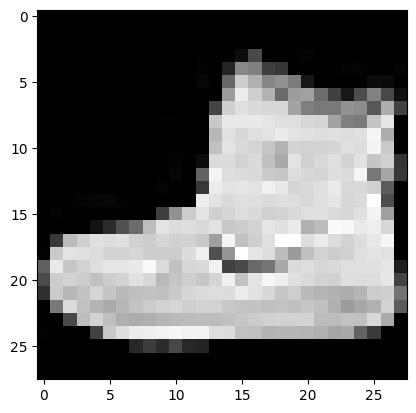

In [129]:
plt.imshow(image.squeeze(), cmap='gray')

In [130]:
image.shape

torch.Size([1, 28, 28])

In [131]:
from helper_functions import accuracy_fn
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.01)


In [132]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [133]:
from torch.nn.modules import module
# Training and testing
#torch.manual_seed(42)
#start_timer=timer()
#epochs=3
#for epoch in range(epochs):
#  print(f'Epoch {epoch}\n--------')
#  train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
#  test_step(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

#total_timer=print_train_time(start=start_timer, end=timer(), device=device)
#print(total_timer)



end_timer=timer()

In [134]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn=torch.nn.Module, accuracy_fn=None):
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
        X, y=X.to(device), y.to(device)
        y_pred=model(X)
        loss+=loss_fn(y_pred, y)
        acc+=accuracy_fn(y_pred.argmax(dim=1), y) # Pass arguments positionally
    loss=loss/len(data_loader)
    acc=acc/len(data_loader)
  return {'model name': model.__class__.__name__, 'model loss' : loss, 'model accuracy': acc}

model_2_results=eval_model(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FashionMNISTModelV2',
 'model loss': tensor(2.3058),
 'model accuracy': 9.994009584664537}

In [135]:
model_0_results=eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [136]:
import pandas as pd
compare_results=pd.DataFrame({ model_0: model_0_results, 'model_1':model_1_results,'model_2': model_2_results})


In [137]:
model_1_results

{'model name': 'FashionMNISTModelV1',
 'model loss': tensor(0.5445),
 'model accuracy': 80.86062300319489}

In [138]:
compare_results


,"FashionMNISTModelV0(\n (layer_stack): Sequential(\n (0): Flatten(start_dim=1, end_dim=-1)\n (1): Linear(in_features=784, out_features=8, bias=True)\n (2): Linear(in_features=8, out_features=10, bias=True)\n )\n)",model_1,model_2
model name,FashionMNISTModelV0,FashionMNISTModelV1,FashionMNISTModelV2
model loss,tensor(0.5225),tensor(0.5445),tensor(2.3058)
model accuracy,81.659345,80.860623,9.99401


In [139]:
#make anad evaluate random predictions
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = device): # Use the globally defined 'device' variable
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample, dim=0).to(device)
      pred_logits=model(sample)
      pred_prob=torch.softmax(pred_logits, dim=1) # Apply softmax across the class dimension (dim=1)
      pred_probs.append(pred_prob.cpu())
  return torch.cat(pred_probs) # Changed torch.stack to torch.cat

Text(0.5, 1.0, 'T-shirt/top')

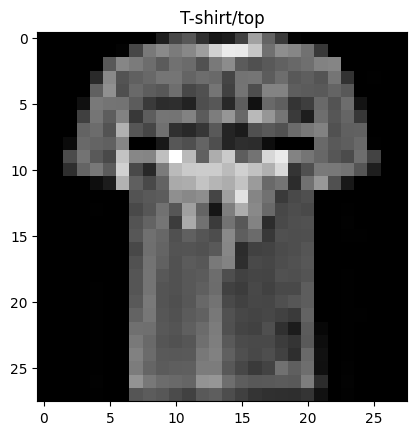

In [140]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])



In [141]:
pred_probs=make_predictions(model=model_2,
                            data=test_samples)
pred_probs[:2]

tensor([[0.0952, 0.1033, 0.1113, 0.1011, 0.0865, 0.1057, 0.0866, 0.1056, 0.1106,
         0.0940],
        [0.0948, 0.1031, 0.1114, 0.1009, 0.0866, 0.1056, 0.0866, 0.1056, 0.1111,
         0.0944]])

In [142]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2])

In [143]:
test_labels

[0, 9, 9, 1, 7, 5, 0, 0, 3]

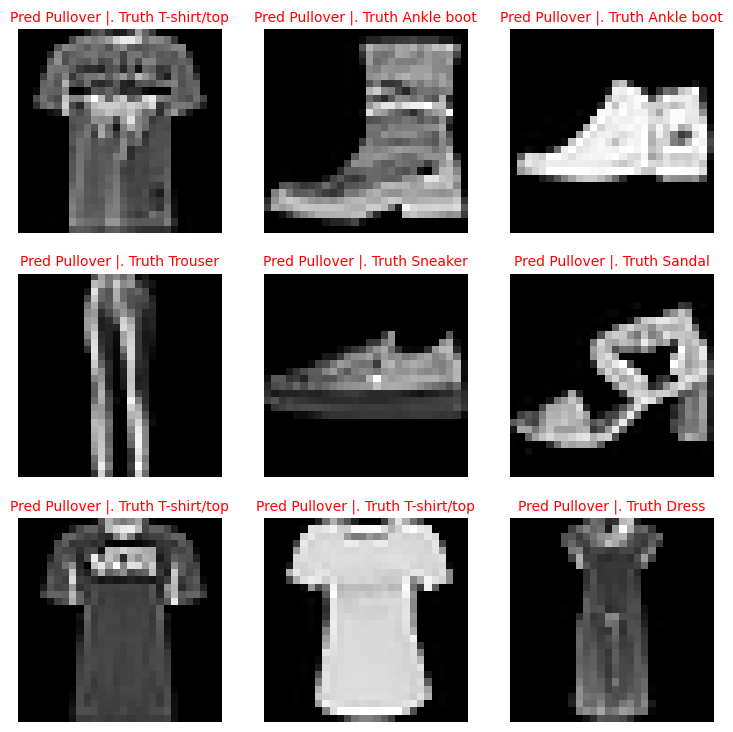

In [144]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap='gray')
  pred_label=class_names[pred_classes[i]]
  truth_label=class_names[test_labels[i]]

  title_text=f'Pred {pred_label} |. Truth {truth_label}'

  if pred_label==truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')
  plt.axis(False)


In [145]:
from tqdm.auto import tqdm

y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making prediction...."):
    X, y=X.to(device), y.to(device)
    y_logits=model_2(X)
    y_pred=torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]



Making prediction....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([8, 0, 7, 5, 6, 3, 4, 5, 4, 4])

In [146]:
import mlxtend

In [147]:
!pip install torchmetrics


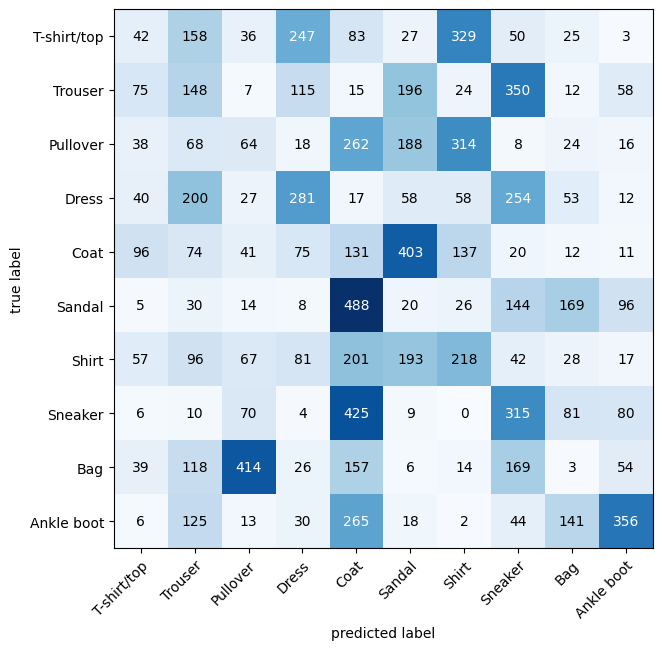

In [148]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
# set up confusion instance and compare predictions to targets
confnat=ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confnat_tensor=confnat(y_pred_tensor, test_data.targets)
fig, ax=plot_confusion_matrix(conf_mat=confnat_tensor.numpy(),
                              class_names=(class_names),
                              figsize=(10, 7))

In [149]:
confnat_tensor

tensor([[ 42, 158,  36, 247,  83,  27, 329,  50,  25,   3],
        [ 75, 148,   7, 115,  15, 196,  24, 350,  12,  58],
        [ 38,  68,  64,  18, 262, 188, 314,   8,  24,  16],
        [ 40, 200,  27, 281,  17,  58,  58, 254,  53,  12],
        [ 96,  74,  41,  75, 131, 403, 137,  20,  12,  11],
        [  5,  30,  14,   8, 488,  20,  26, 144, 169,  96],
        [ 57,  96,  67,  81, 201, 193, 218,  42,  28,  17],
        [  6,  10,  70,   4, 425,   9,   0, 315,  81,  80],
        [ 39, 118, 414,  26, 157,   6,  14, 169,   3,  54],
        [  6, 125,  13,  30, 265,  18,   2,  44, 141, 356]])

In [150]:
# 11 Save and load model
from  pathlib import Path
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME='03_computer_vision_model_v2.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(f"SAVED model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

SAVED model to models/03_computer_vision_model_v2.pth


In [151]:
# Check the saved file path
!ls -l models/03_computer_vision_model_v2.pth

-rw-r--r-- 1 root root 29189 Jan 27 18:49 models/03_computer_vision_model_v2.pth


In [152]:
torch.manual_seed(42)
loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Sent to model to target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [153]:
torch.manual_seed(42)

loaded_model_2_results=eval_model(model=loaded_model_2,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)


  0%|          | 0/313 [00:00<?, ?it/s]

In [154]:
loaded_model_2_results

{'model name': 'FashionMNISTModelV2',
 'model loss': tensor(2.3058),
 'model accuracy': 9.994009584664537}

In [155]:
model_2_results

{'model name': 'FashionMNISTModelV2',
 'model loss': tensor(2.3058),
 'model accuracy': 9.994009584664537}

In [156]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(42)


In [157]:
# Training data (small)
X_train = torch.linspace(-3, 3, 30).unsqueeze(1)
y_train = X_train**3 + 0.5 * torch.randn_like(X_train)

# Validation data (unseen)
X_val = torch.linspace(-3, 3, 100).unsqueeze(1)
y_val = X_val**3


In [158]:
class OverfitNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.net(x)

model = OverfitNet()


In [159]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_losses = []
val_losses = []

for epoch in range(1000):
    # Train
    model.train()
    optimizer.zero_grad()
    train_pred = model(X_train)
    train_loss = criterion(train_pred, y_train)
    train_loss.backward()
    optimizer.step()

    # Validate
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    if epoch % 200 == 0:
        print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


Epoch 0 | Train Loss: 125.8773 | Val Loss: 88.0366
Epoch 200 | Train Loss: 0.2367 | Val Loss: 0.1432
Epoch 400 | Train Loss: 0.1781 | Val Loss: 0.1625
Epoch 600 | Train Loss: 0.1420 | Val Loss: 0.1821
Epoch 800 | Train Loss: 0.1333 | Val Loss: 0.1968


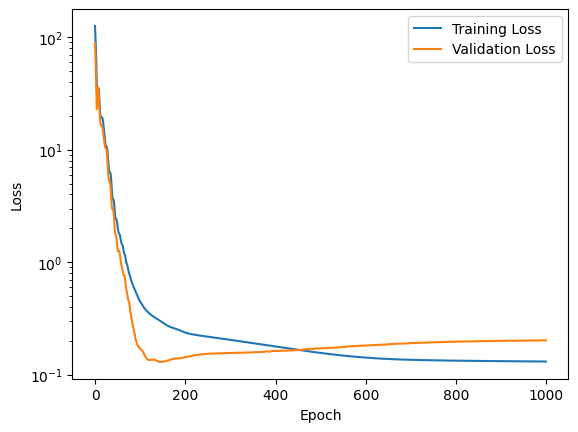

In [160]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()



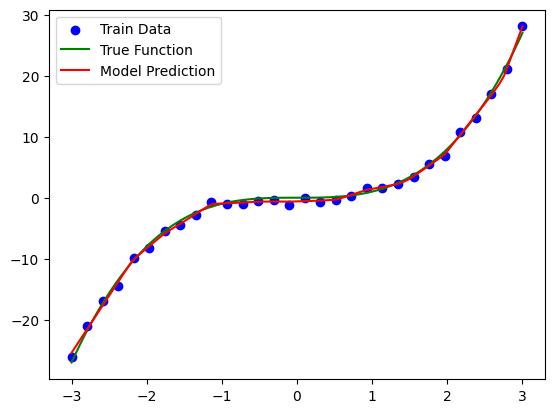

In [161]:
with torch.no_grad():
    y_pred = model(X_val)

plt.scatter(X_train, y_train, label="Train Data", color="blue")
plt.plot(X_val, y_val, label="True Function", color="green")
plt.plot(X_val, y_pred, label="Model Prediction", color="red")
plt.legend()
plt.show()


# Assignment

In [162]:
import torchvision
from torchvision import datasets

train_data=datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data=datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)


In [163]:
class_names=train_data.classes

class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [164]:
len(train_data), len(test_data)

(60000, 10000)

Text(0.5, 1.0, '5 - five')

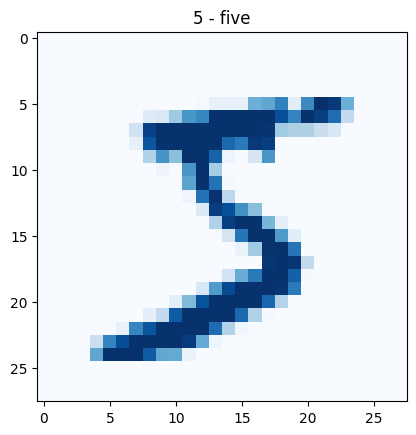

In [165]:

import matplotlib.pyplot as plt
image, label=train_data[0]
plt.imshow(image.squeeze(), cmap='Blues')
plt.title(class_names[label])
#


In [166]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader=DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)


In [169]:
# Create a convolutional neural network
class MNISTModel(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_3 = MNISTModel(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_3

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [170]:
model_3=MNISTModel(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
model_3

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [171]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [172]:
next(model_3.parameters()).device

device(type='cpu')

In [173]:
model_3.parameters()

<generator object Module.parameters at 0x7864b4d32ea0>

In [174]:
#accuracy
from helper_functions import accuracy_fn
optimizer=torch.optim.Adam(params=model_3.parameters(), lr=0.01)
loss_fn=torch.nn.CrossEntropyLoss()

In [175]:
def train_step(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
    train_loss, train_acc=0 , 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X, y=X.to(device), y.to(device)
        y_pred=model(X)
        #loss
        loss=loss_fn(y_pred, y)
        train_loss+=loss.item() # Use .item() to get Python float
        #accuracy
        train_acc+=accuracy_fn(y_pred.argmax(dim=1), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss/=len(data_loader) # Divide by number of batches
    train_acc/=len(data_loader) # Divide by number of batches
    print(f'Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.5f}')
def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
    test_loss, test_acc=0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):
            X, y=X.to(device), y.to(device)
            y_pred=model(X)
            test_loss+=loss_fn(y_pred, y).item() # Use .item() to get Python float
            test_acc+=accuracy_fn(y_pred.argmax(dim=1), y)
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        print(f'Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}')

In [176]:
from torch import nn

# Redefine MNISTModel to ensure it's the correct version
class MNISTModel(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.layer_stack_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3)
    )
    self.layer_stack_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=2, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*5*5, out_features=output_shape) # Corrected in_features
    )

  def forward(self, x):
    x=self.layer_stack_1(x)
    x=self.layer_stack_2(x)
    x=self.classifier(x)
    return x

# Re-instantiate model_3 with the correct definition
model_3=MNISTModel(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

# RE-INITIALIZE OPTIMIZER FOR THE NEW model_3
optimizer=torch.optim.Adam(params=model_3.parameters(), lr=0.01)

torch.manual_seed(42)
epochs=3

from timeit import default_timer
start_time_3=timer()
for epoch in range(epochs):
    print(f'Epoch {epoch}\n--------')
    train_step(model=model_3,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_3,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device
    )

end_timer_3=timer()
total_time_3=print_train_time(start=start_time_3, end=end_timer_3, device=device)

Epoch 0
--------
Train Loss: 0.19532 | Train Acc: 94.06000
Test Loss: 0.10836 | Test Acc: 96.67532
Epoch 1
--------
Train Loss: 0.10404 | Train Acc: 96.87833
Test Loss: 0.09956 | Test Acc: 96.73522
Epoch 2
--------
Train Loss: 0.09555 | Train Acc: 97.10167
Test Loss: 0.08891 | Test Acc: 97.37420
Train time on cpu : 166.947 seconds


In [177]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn=torch.nn.Module, accuracy_fn=None):
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
        X, y=X.to(device), y.to(device)
        y_pred=model(X)
        loss+=loss_fn(y_pred, y)
        acc+=accuracy_fn(y_pred.argmax(dim=1), y) # Pass arguments positionally
    loss=loss/len(data_loader)
    acc=acc/len(data_loader)
  return {'model name': model.__class__.__name__, 'model loss' : loss, 'model accuracy': acc}

model_3_results=eval_model(model=model_3,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_3_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'MNISTModel',
 'model loss': tensor(0.0889),
 'model accuracy': 97.37420127795527}

In [178]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results, model_1_results, model_2_results, model_3_results])
compare_results

,model name,model loss,model accuracy
0,FashionMNISTModelV0,tensor(0.5225),81.659345
1,FashionMNISTModelV1,tensor(0.5445),80.860623
2,FashionMNISTModelV2,tensor(2.3058),9.994010
3,MNISTModel,tensor(0.0889),97.374201


In [179]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit, dim=1) # Apply softmax across the class dimension (dim=1) directly to pred_logit

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.cat(pred_probs)

In [180]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [181]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_3,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.3253e-07, 3.3570e-05, 9.9997e-01, 6.1617e-09, 3.7068e-14, 4.3518e-12,
         1.3303e-12, 8.3463e-08, 3.9787e-08, 1.6228e-11],
        [4.6498e-05, 3.5827e-01, 1.3242e-03, 4.1725e-04, 4.9371e-04, 1.4186e-01,
         2.0391e-01, 1.1916e-02, 2.7960e-01, 2.1630e-03]])

In [182]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

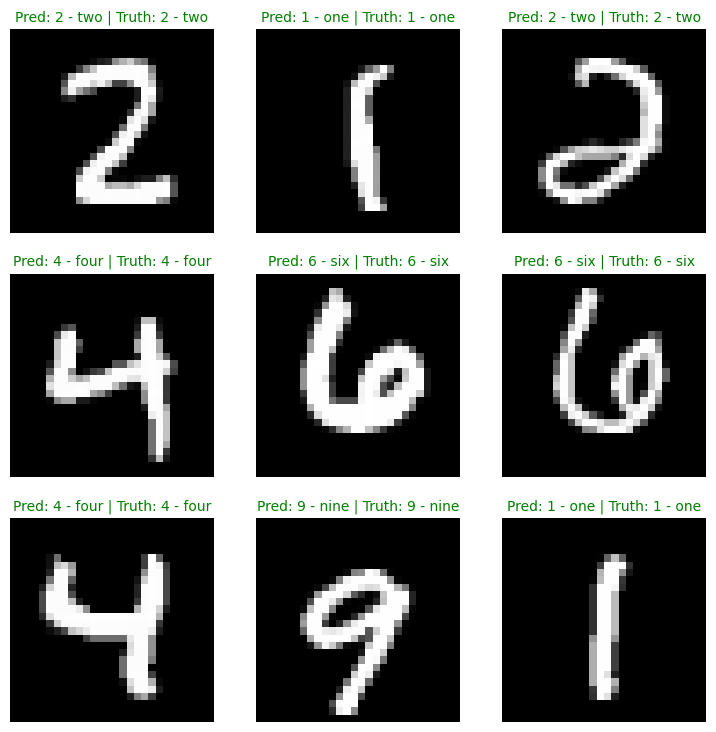

In [183]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [184]:
from tqdm.auto import tqdm
import torch
y_preds=[]
model_3.eval() # Set model to evaluation mode
torch.manual_seed(42)
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making predictions.....'):
    X, y=X.to(device) , y.to(device)
    y_logit=model_3(X)
    y_pred=torch.softmax(y_logit.squeeze(), dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making predictions.....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

In [185]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


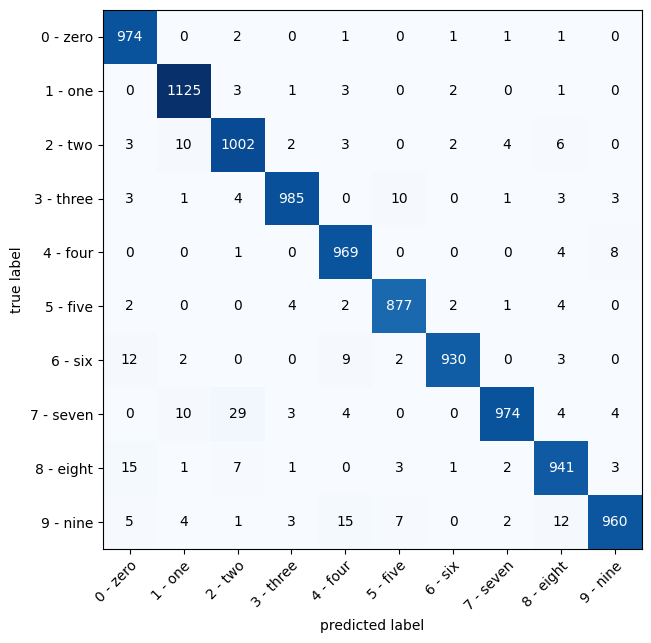

In [186]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Create a ConfusionMatrix instance
confmat=ConfusionMatrix(num_classes=len(class_names), task='multiclass')

# Calculate the confusion matrix
# Note: test_data.targets is already a tensor of labels, matching y_pred_tensor
confmat_tensor=confmat(y_pred_tensor, test_data.targets)

# Plot the confusion matrix
fig, ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                              class_names=class_names,
                              figsize=(10, 7));

In [187]:
from pathlib import Path

MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME='03_computer_vision_model_3.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(f'Saved to {MODEL_SAVE_PATH}')
torch.save(obj=model_3.state_dict(), f=MODEL_SAVE_PATH)

Saved to models/03_computer_vision_model_3.pth


In [188]:
loaded_model_3=MNISTModel(input_shape=1, hidden_units=10, output_shape=len(class_names))
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_3.to(device)

MNISTModel(
  (layer_stack_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_stack_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=250, out_features=10, bias=True)
  )
)

In [189]:
loaded_model_3_results=eval_model(model=loaded_model_3,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn)
loaded_model_3_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'MNISTModel',
 'model loss': tensor(0.0889),
 'model accuracy': 97.37420127795527}